# Wikipedia Classification assignment

- Look here: https://www.doc.ic.ac.uk/~js4416/163/website/nlp/
- take N classes of wikipedia articles (laziest way possible) (for each class – 1000 articles)
- create an autoencoder to compress the articles
- perform classification with typical classifier.

Discussion

- Compare to a classification on plain text
- Compare to PCA

In [1]:
import utils
import getfeatures

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## N classes of wikipedia articles (1000 articles each)

In [9]:
data_dir = 'data'
max_pages = 1000
max_categories = 20

getfeatures.get_features(data_dir, max_pages, max_categories)

data_file = "Wikipedia_{0}_{1}.pkl".format(max_pages, max_categories)

Getting Category:People
 oooooooooooooooooooo [100.00%]
Getting Category:Law
 oooooooooooooooooooo [100.00%]
Getting Category:History
 oooooooooooooooooooo [100.00%]
Getting Category:Philosophy
 oooooooooooooooooooo [100.00%]
Getting Category:Life
 oooooooooooooooooooo [100.00%]
Getting Category:Culture
 oooooooooooooooooooo [100.00%]
Getting Category:Health
 oooooooooooooooooooo [100.00%]
Getting Category:Politics
 oooooooooooooooooooo [100.00%]
Getting Category:Events
 oooooooooooooooooooo [100.00%]
Getting Category:Nature
 oooooooooooooooooooo [100.00%]
Getting Category:Arts
 oooooooooooooooooooo [100.00%]
Getting Category:Reference
 oooooooooooooooooooo [100.00%]
Getting Category:Religion
 oooooooooooooooooooo [100.00%]
Getting Category:Mathematics
 oooooooooooooooooooo [100.00%]
Getting Category:Society
 oooooooooooooooooooo [100.00%]
Getting Category:Geography
 oooooooooooooooooooo [100.00%]
Getting Category:Humanities
 oooooooooooooooooooo [100.00%]
Getting Category:Education
 o

## Initial data preparation

Before compressing and classifying I performed some preparation steps:

- Vectorizing with a CountVectorizer, removing english stop-words.
- Using a TF-IDF transformer with no inverse-document-frequency weighting

In [2]:
# Load the data from the pickled file
data_dir = 'data'
max_pages = 1000
max_categories = 20

data_file = "Wikipedia_{0}_{1}.pkl".format(max_pages, max_categories)

## Create an autoencoder to compress the articles

This pipeline incorporates the symmetric autoencoder to compress the data. After experimenting with a rather simple autoencoder architecture with one hidden layer that resulted in just about 48% accuracy I moved to a more complex one (including BatchNormalization and Drop-Out Layers).

## Perform classification with typical classifier.

As a classifier I chose SGDClassifier as I already had experience with it (in text classification) and it supports both SVM and Logistic Regression.

## Results (with Autoencoder)

The accuracy of the compressed classification model was **64.14%** on training and **59.82%** on test.

Loaded 20000 rows with 20 distinct classes
Training model
Train on 10500 samples, validate on 4500 samples
Epoch 1/30
10500/10500 [==============================] - 80s 8ms/step - loss: 0.0864 - val_loss: 0.0013
Epoch 2/30
10500/10500 [==============================] - 71s 7ms/step - loss: 9.0219e-04 - val_loss: 7.0116e-04
Epoch 3/30
10500/10500 [==============================] - 66s 6ms/step - loss: 6.2817e-04 - val_loss: 5.7081e-04
Epoch 4/30
10500/10500 [==============================] - 64s 6ms/step - loss: 5.5116e-04 - val_loss: 5.2669e-04
Epoch 5/30
10500/10500 [==============================] - 71s 7ms/step - loss: 5.1772e-04 - val_loss: 5.0414e-04
Epoch 6/30
10500/10500 [==============================] - 68s 6ms/step - loss: 5.0049e-04 - val_loss: 4.9215e-04
Epoch 7/30
10500/10500 [==============================] - 65s 6ms/step - loss: 4.9027e-04 - val_loss: 4.8471e-04
Epoch 8/30
10500/10500 [==============================] - 71s 7ms/step - loss: 4.8378e-04 - val_loss: 4.7950e-

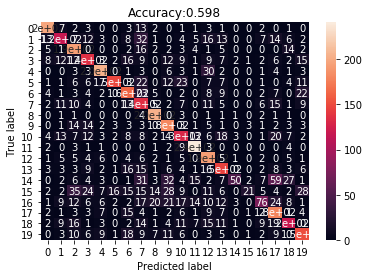

In [3]:
utils.fit_and_evaluate_model(data_dir, data_file, dimension_red="autoencoder")

## Results (with plain text)

The accuracy of the un-compressed classification model however was **72.86%** on training and **65.66%** on test.

Loaded 20000 rows with 20 distinct classes
Training model
Score on training data: 0.7286
Score on test data: 0.6566
Classification report:
                                 precision    recall  f1-score   support

                  Category:Arts       0.67      0.87      0.76       243
               Category:Culture       0.61      0.50      0.55       270
             Category:Education       0.60      0.85      0.70       223
                Category:Events       0.72      0.43      0.54       253
             Category:Geography       0.75      0.74      0.75       244
                Category:Health       0.67      0.86      0.75       234
               Category:History       0.70      0.72      0.71       266
            Category:Humanities       0.62      0.56      0.59       248
              Category:Language       0.66      0.97      0.79       241
                   Category:Law       0.60      0.85      0.71       246
                  Category:Life       0.72      0.49     

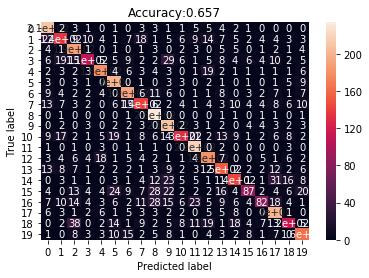

In [4]:
utils.fit_and_evaluate_model(data_dir, data_file, dimension_red="none")

## Results (PCA)

Using PCA to reduce dimensionality could still achieve **70.66%** on training and **66.54%** on test.

Loaded 20000 rows with 20 distinct classes
Training model
Score on training data: 0.7066
Score on test data: 0.6654
Classification report:
                                 precision    recall  f1-score   support

                  Category:Arts       0.71      0.86      0.78       238
               Category:Culture       0.55      0.48      0.51       240
             Category:Education       0.63      0.86      0.73       224
                Category:Events       0.71      0.48      0.57       235
             Category:Geography       0.82      0.72      0.76       284
                Category:Health       0.76      0.87      0.81       254
               Category:History       0.63      0.73      0.68       260
            Category:Humanities       0.68      0.53      0.60       246
              Category:Language       0.70      0.96      0.81       251
                   Category:Law       0.60      0.83      0.70       242
                  Category:Life       0.75      0.49     

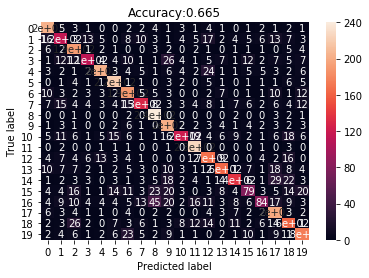

In [6]:
utils.fit_and_evaluate_model(data_dir, data_file, dimension_red="pca")

## Results (LSA)

Because PCA does not work with dense matrices I chose LSA for comparison purposes
(and in order to save the conversion of the sparse to a dense matrix.

Accuracies of **70.12%** on training and **66.78%** on test could be achieved - only a little less than PCA.

Loaded 20000 rows with 20 distinct classes
Training model
Score on training data: 0.7012
Score on test data: 0.6678
Classification report:
                                 precision    recall  f1-score   support

                  Category:Arts       0.66      0.93      0.77       246
               Category:Culture       0.69      0.46      0.55       243
             Category:Education       0.69      0.85      0.76       258
                Category:Events       0.77      0.45      0.57       245
             Category:Geography       0.81      0.76      0.79       258
                Category:Health       0.71      0.86      0.78       264
               Category:History       0.62      0.73      0.67       251
            Category:Humanities       0.65      0.51      0.57       247
              Category:Language       0.66      0.95      0.78       237
                   Category:Law       0.58      0.82      0.68       234
                  Category:Life       0.60      0.57     

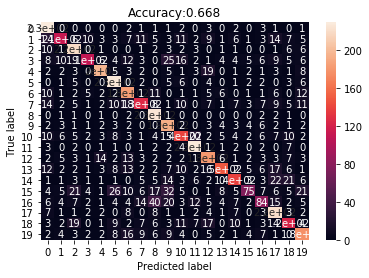

In [7]:
utils.fit_and_evaluate_model(data_dir, data_file, dimension_red="svd")

## Comparison

### Autoencoder vs. plain



### Autoencoder vs. PCA